In [22]:
import numpy as np
from keras.models import Sequential,load_model
import keras.applications
from keras.layers import Dense,Activation,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
import os

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Digit: 5')

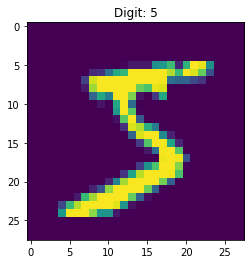

In [3]:

plt.imshow(X_train[0])
plt.title("Digit: {}".format(y_train[0]))


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





 - 7s - loss: 0.2529 - acc: 0.9239 - val_loss: 0.1044 - val_acc: 0.9681
Epoch 2/20
 - 6s - loss: 0.1017 - acc: 0.9688 - val_loss: 0.0788 - val_acc: 0.9754
Epoch 3/20
 - 5s - loss: 0.0711 - acc: 0.9778 - val_loss: 0.0640 - val_acc: 0.9797
Epoch 4/20
 - 7s - loss: 0.0565 - acc: 0.9822 - val_loss: 0.0611 - val_acc: 0.9810
Epoch 5/20
 - 6s - loss: 0.0463 - acc: 0.9854 - val_loss: 0.0701 - val_acc: 0.9792
Epoch 6/20
 - 5s - loss: 0.0397 - acc: 0.9871 - val_loss: 0.0689 - val_acc: 0.9792
Epoch 7/20
 - 6s - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0666 - val_acc: 0.9806
Epoch 8/20
 - 5s - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0671 - val_acc: 0.9798
Epoch 9/20
 - 7s - loss: 0.0283 - acc: 0.9903 - val_loss: 0.0711 - val_acc: 0.9808
Epoch 10/20
 - 12s - loss: 0.0241 - acc: 0.9918 - val_loss: 0.0651 - val_acc: 0.9821
Epoch 11/20
 - 7

In [13]:
# saving the model
save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist.h5 


In [18]:
mnist_model = load_model("keras_mnist.h5")

In [19]:
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy",loss_and_metrics[1])

Test Loss 0.08204518465181913
Test Accuracy 0.9832


In [32]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [39]:
test = X_test[0].reshape((1,784))

In [42]:
mnist_model.predict_classes(test)

array([7])

Text(0.5, 1.0, 'Digit: 7')

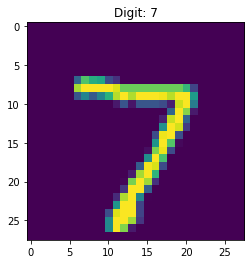

In [48]:
plt.imshow(X_test[0].reshape((28,28)))
plt.title("Digit: {}".format(y_test[0]))